# Convolutional Neural Network



In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras


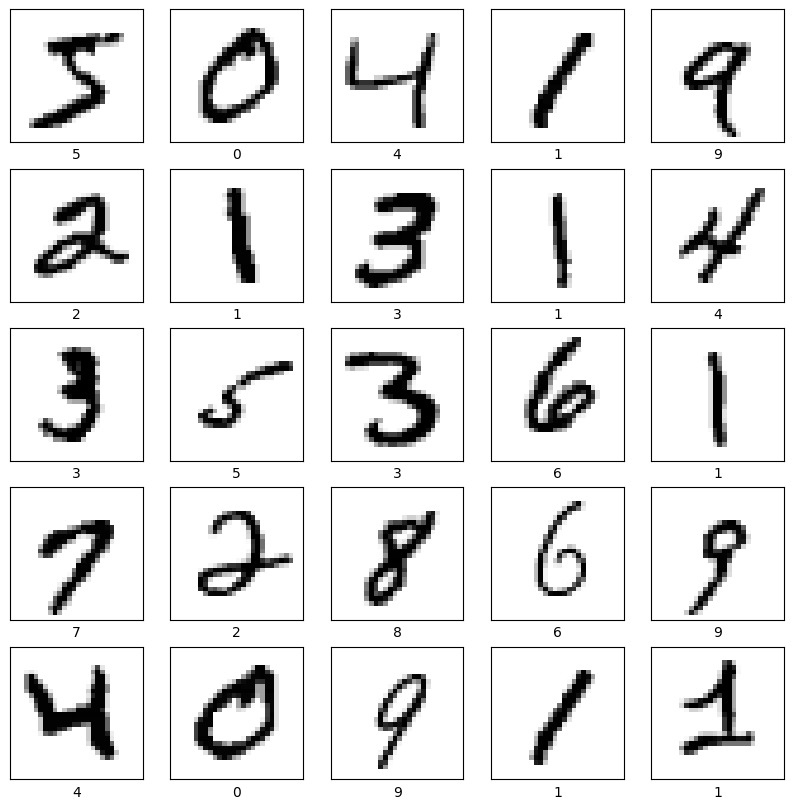

In [38]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()


In [39]:
print("we have {} training samples and {} test samples".format(x_train.shape[0],x_test.shape[0]))

we have 60000 training samples and 10000 test samples


Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0 128 128 255 255 255 191  64   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0 128 255 255 255 255 255 255 255 255 128   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0 191 255 255 255 255 255 255 255 255 255 25

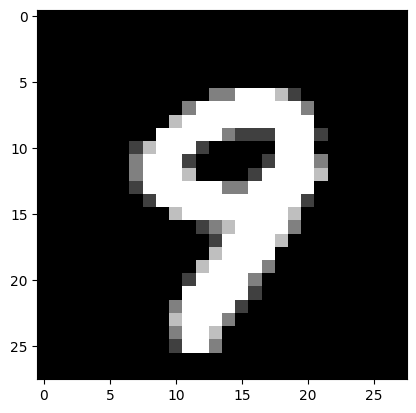

In [40]:
plt.imshow(x_train[5999], cmap='gray')

# Display the values of each pixel in the image
print("Pixel values:")
for row in x_train[5999]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()

In [41]:
type(x_train)

numpy.ndarray

In [42]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
type(x_train)

numpy.ndarray

In [46]:
import tensorflow as tf
from tensorflow.keras import layers

# create an input layer
input_layer = tf.keras.layers.Input(shape=(28, 28, 1)) # 28x28 pixel images with a single color channel

# CNN model building

model = tf.keras.Sequential([
    input_layer, # input layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer 
    # filter is the number of filters we want to apply
    # kernel is the size of window/filter moving over the image
    layers.Conv2D(filters=10, kernel_size=(3, 3),  activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    
    layers.Flatten(), # flatten layer
    layers.Dense(10, activation='softmax') # output layer # why did we add 10?
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 10, 10, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,440 (17.34 KB)

 Trainable params: 4,440 (17.34 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10,batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.9921 - loss: 0.0243 - val_accuracy: 0.9894 - val_loss: 0.0317
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9922 - loss: 0.0243 - val_accuracy: 0.9894 - val_loss: 0.0338
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9929 - loss: 0.0230 - val_accuracy: 0.9906 - val_loss: 0.0302
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9927 - loss: 0.0224 - val_accuracy: 0.9904 - val_loss: 0.0295
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9938 - loss: 0.0208 - val_accuracy: 0.9903 - val_loss: 0.0310
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9944 - loss: 0.0178 - val_accuracy: 0.9890 - val_loss: 0.0371
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9937 - loss: 0.0175 - val_accuracy: 0.9904 - val_loss: 0.0322
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9938 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9865 - loss: 0.0420
the loss of the test model:  0.033363886177539825
the accuracy of the test model:  0.9900000095367432


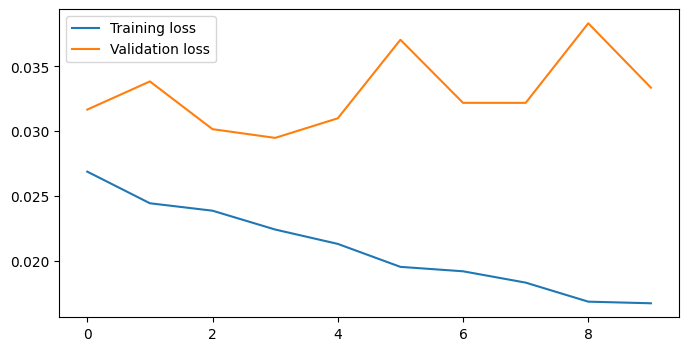

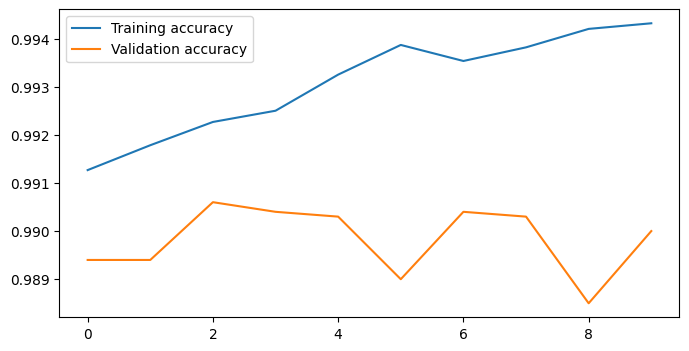

In [59]:
loss, mae = model.evaluate(x_test, y_test, verbose=1)
print("the loss of the test model: ",loss)
print("the accuracy of the test model: ",mae)

# plot the training and testing loss and accuracy at each epoch
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(history.history['loss'], label='Training loss')
ax.plot(history.history['val_loss'], label='Validation loss')
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(history.history['accuracy'], label='Training accuracy')
ax.plot(history.history['val_accuracy'], label='Validation accuracy')
ax.legend()
plt.show()


(28, 28)
(28, 28, 1)


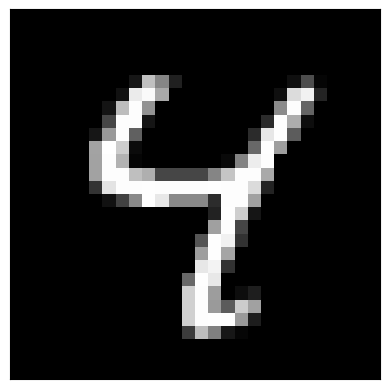

In [68]:
# grab an image
img = x_test[6]
print(img.shape)

# rehape the image to (28, 28, 1)
img = img.reshape((28, 28, 1))
print(img.shape)

plt.imshow(img, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [71]:
# predict the image
predictions = model.predict(img.reshape(1, 28, 28, 1))
print(predictions[:,4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[0.9999987]
